In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Punto 7

In [2]:
# Definición del sistema en una tupla

G=(lambda x,y,z,w: (x**2) + (y**2) + (z**2) + (w**2) - 1)


In [3]:

def GetVectorF(G,r):
        
    for i in range(4):
        v = G(r[0],r[1],r[2],r[3])
        
    return v


In [14]:

def GetJacobian(G,r,h=1e-6):
        
    J = np.zeros((4))
  
    J[0] = (  G(r[0]+h,r[1],r[2],r[3]) - G(r[0]-h,r[1],r[2],r[3]) )/(2*h)
    J[1] = (  G(r[0],r[1]+h,r[2],r[3]) - G(r[0],r[1]-h,r[2],r[3]) )/(2*h)
    J[2] = (  G(r[0],r[1],r[2]+h,r[3]) - G(r[0],r[1],r[2]-h,r[3]) )/(2*h)
    J[3] = (  G(r[0],r[1],r[2],r[3]+h) - G(r[0],r[1],r[2],r[3]-h) )/(2*h)
        
    return J.T


In [5]:

def GetMetric(G,r):
    
    v = GetVectorF(G,r)
    
    return 0.5*np.linalg.norm(v)**2


In [6]:

GetMetric(G,[1,1,1,1])


4.5

In [13]:

def GetFig(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X','Y','Z', 'W']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()
    

In [8]:

def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        
        if it%500 == 0:
            
            #print(it,d)
            clear_output(wait=True)
            GetFig(Vector_F,R_vector,it)
            time.sleep(0.01)
            
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector


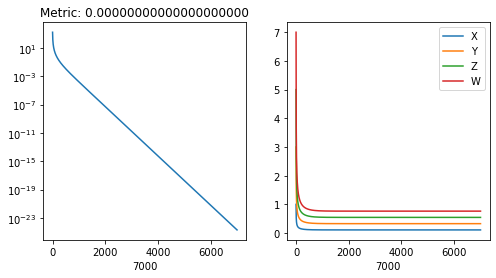

 Entrenamiento completo  0.0 iteraciones 7467


In [9]:

xsol,it,F,R = GetSolve(G,[1,3,5,7],lr=1e-3)


In [10]:

xsol


array([0.10910895, 0.32732684, 0.54554473, 0.76376262])

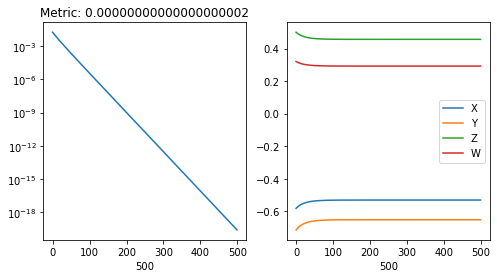

 Entrenamiento completo  0.0 iteraciones 764
999


In [12]:

Valores = []

for i in range (1000):
    
    radio = np.random.uniform(-1,1,size = 4)
    
    V,it,f,R = GetSolve(G,radio,lr = 1e-2, error = 1e-3)
    
    Valores.append(V)
    print (i)
    
    

In [15]:

len(Valores)


1000

In [20]:

Valores_Esfera = []

for i in range(1000):
    datos = Valores[i]
    if (np.round((datos[0]**2 + datos[1]**2 + datos[2]**2 + datos[3]**2),5)) == 1:
        Valores_Esfera.append(datos)

print(len(Valores_Esfera))


1000


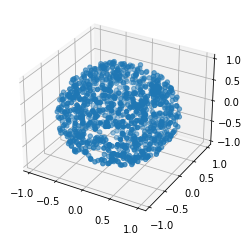

In [24]:

x = []
y = []
z = []

for i in range(len(Valores)):
    x.append(Valores_Esfera[i][0])
    y.append(Valores_Esfera[i][1])
    z.append(Valores_Esfera[i][2])
    
ax = plt.figure().add_subplot(1,1,1, projection = '3d')

ax.scatter(x,y,z)
